## Visualization of NLS Solutions 

**Lane Ellisor**

*Last Edited: 22 June 2021*

This notebook will plot the unstable regions of damped and undamped solutions to NLS. Surface Plots of Ablowitz-Herbst (12) follow. This notebook is best viewed in Jupyter Notebook/Lab, rather than an html or pdf form.

In [1]:
# importing modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import scipy.integrate as integrate
import scipy.special as special
from scipy import optimize

import sympy as sp
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy import arange,meshgrid,sqrt

import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import display, Latex

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import warnings

warnings.filterwarnings("ignore")

### Frequency Visualizations

We will begin by plotting frequency for the undamped case;

$$\sqrt{k^2(k^2-4a^2)} = \omega$$

where $k$ is the wave number and $a$ is the amplitude. Note that instability will occur when

$$k^2 < 4a^2 $$

or $k<2a$. First I will find the maximum of $\omega$ using sympy and implement it into the plotter. 

In [2]:
from sympy import *
x = Symbol('x', real=True)
a = Symbol('a', real=True)

f = x*sqrt(4*a**2-x**2)
fprime = f.diff(x)
print(fprime)
solve(fprime, x)


-x**2/sqrt(4*a**2 - x**2) + sqrt(4*a**2 - x**2)


[-sqrt(2)*a, sqrt(2)*a]

In [3]:
def f(a):
    fig = plt.figure(figsize = (10,5))

    x = np.linspace(0,15, 100)

    w_unstable = x*np.sqrt(4*a**2-x**2)
    w_stable = x*np.sqrt(x**2-4*a**2)
    def unstable(x):
        return x*np.sqrt(4*a**2-x**2)
    plt.scatter(np.sqrt(2)*a, unstable(np.sqrt(2)*a),color='C1', label='Maximum')
    plt.plot(x,w_stable, label='Stable')
    plt.plot(x,w_unstable, label='Unstable')

    plt.axvline(x=2*a, color='C7', linewidth=.8, label='$k=2a$')
    
    
    plt.xlabel('$k$')
    plt.ylabel('$|\omega|$')
    plt.title('Frequency Norm vs. Wavenumber')
    plt.legend()
    
    plt.show()
    print('The maximum value of |ω| is', unstable(np.sqrt(2)*a) )
interact(f, a=2.00)

interactive(children=(FloatSlider(value=2.0, description='a', max=6.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.f(a)>

We now plot frequency for the damped case;

$$\pm k\sqrt{k^2-4a^2e^{-2\Gamma t}} = \omega$$

where $\Gamma$ is the damping coefficient. These plots will be found at the times $t=1$ and $t=10$. The stability condition here is 

$$k^2-4a^2e^{-2\Gamma t}<0$$

or $k^2<4a^2e^{-2\Gamma t}$.

In [4]:
t = Symbol('t')
G = Symbol('\Gamma')

f = x*sqrt(x**2-4*a**2*exp(-2*G*t))
fprime = f.diff(x)
print(fprime)
solve(fprime, x)

x**2/sqrt(-4*a**2*exp(-2*\Gamma*t) + x**2) + sqrt(-4*a**2*exp(-2*\Gamma*t) + x**2)


[-sqrt(2)*a*exp(-\Gamma*t), sqrt(2)*a*exp(-\Gamma*t)]

In [5]:
def f(a, G,t):
    fig = plt.figure(figsize = (10,5))

    x = np.linspace(0,15, 100)
    w_unstable = x*np.sqrt(4*a**2*np.exp(-2*G*t)-x**2)
    w_stable = x*np.sqrt(x**2-4*a**2*np.exp(-2*G*t))
    def unstable_d(x):
        return x*np.sqrt(4*a**2*np.exp(-2*G*t)-x**2)
    plt.scatter(np.sqrt(2)*a*np.exp(-G*t), unstable_d(np.sqrt(2)*a*np.exp(-G*t)),color='C1', label='Maximum')
    plt.plot(x,w_stable, label='Stable')
    plt.plot(x,w_unstable, label='Unstable')

    plt.axvline(x=2*a*np.exp(-G*t), color='C7', linewidth=.8, label='$k=2a$')
    
    
    plt.xlabel('$k$')
    plt.ylabel('$|\omega|$')
    plt.title('Frequency Norm vs. Wavenumber')
    plt.legend()
    
    plt.show()
    print('The maximum value of |ω| is', unstable_d(a*np.exp(-G*t)*np.sqrt(2)) )
interact(f, a=3.00, G=1.00, t= 0.0)

interactive(children=(FloatSlider(value=3.0, description='a', max=9.0, min=-3.0), FloatSlider(value=1.0, descr…

<function __main__.f(a, G, t)>

In [6]:
def damped1(a,t, view):
    fig = plt.figure(figsize = (10,10))

    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(elev=20, azim=view)
    # Make data.
    k = np.linspace(0, 5, 1000)
    g = np.linspace(0, 5, 1000)
    K, G = np.meshgrid(k, g) #creating the mesh


    w_stable = K*np.sqrt(-(4*a**2*np.exp(-2*G*t)-K**2))
    w_unstable = K*np.sqrt(-(K**2-4*a**2*np.exp(-2*G*t)))


    # Plot the surface.
    surf1 = ax.plot_surface(X=K, Y=G,Z=w_unstable, alpha=.9, label='unstable')
    surf1._facecolors2d = surf1._facecolor3d
    surf1._edgecolors2d = surf1._edgecolor3d

    # Plot the surface.
    surf2 = ax.plot_surface(K, G, w_stable, alpha=.9, label='stable')
    surf2._facecolors2d = surf2._facecolor3d
    surf2._edgecolors2d = surf2._edgecolor3d
    
    ax.scatter(0,0,0, color='k', label='Origin')
    #labelling axes
    ax.set_xlabel('$k$')
    ax.set_ylabel('$\Gamma$')
    ax.set_zlabel('$\omega$')

    ax.text2D(0.05, 0.92, "$\omega$($k$,$\Gamma$)", transform=ax.transAxes)
    ax.legend()
    plt.show()
interact(damped1, a=1.40, view=150, t=0.0)

interactive(children=(FloatSlider(value=1.4, description='a', max=4.199999999999999, min=-1.4), FloatSlider(va…

<function __main__.damped1(a, t, view)>

### Plotting Perturbations

We have found a solution to NLS of the form 

$$u(x,t) = a exp(2ia^2t)\frac{1+2cos(px)exp(\Omega t + 2 i \varphi + \gamma) + A_{12} exp(2\Omega t + 4 i \varphi + 2\gamma)}{1+2cos(px)exp(\Omega t+\gamma) + A_{12}exp(2\Omega t + 2\gamma)}$$

where $\varphi$ is a real constant corresponding to a complex phase shift, $a$ denotes the amplitude, $p$ is the wavenumber, and $\Omega$ is the frequency. Furthermore define

$$ p = 2asin(\varphi)\\ \Omega = \pm p \sqrt{4a^2-p^2}\\ A_{12}=\frac{1}{cos^2\varphi}$$

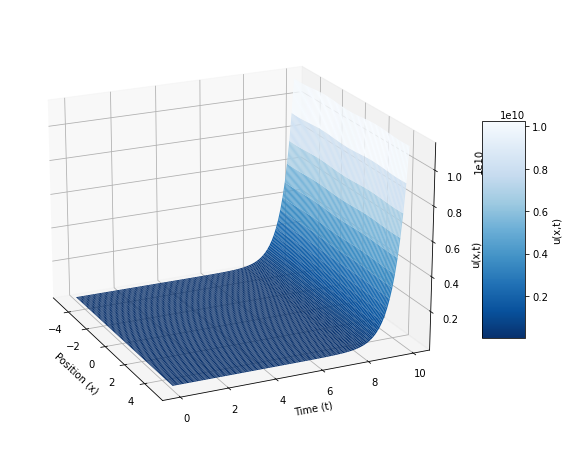

In [7]:
a = 1.
phi = np.pi / 4
O = .3
gamma = 2

p = 2*a*np.sin(phi)

A_12 = 1 / (np.cos(phi)**2)

#definition of figure => make sure to specify 3d
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111,projection='3d')

ax.view_init(elev=20, azim=-25)
# Make data.
x = np.linspace(-5, 5,100)
t = np.linspace(0, 10, 100)
X, T = np.meshgrid(x, t) #creating the mesh



U = (a*np.exp(2*a**2*T)*(1+2*np.cos(p*X)*np.exp(O*T+2*phi+gamma)+A_12 * np.exp(2*O*T+4*phi+2*gamma)))/(1+2*np.cos(p*X)*np.exp(O*T+gamma)+A_12*np.exp(2*O*T+2*gamma))

# Plot the surface.
surf = ax.plot_surface(X, T, U, rstride=1, cstride=1,
                cmap='Blues_r', edgecolor='none')


# This is the creation of the color label by height
cbar = fig.colorbar(surf, shrink=.4, aspect=5)
cbar.ax.set_ylabel('u(x,t)')


#labelling axes
ax.set_xlabel('Position (x)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('u(x,t)')


plt.show()

In [8]:
def f(a, phi, gamma, view):
    
    #definition of figure => make sure to specify 3d
    fig = plt.figure(figsize = (15,15))
    
    ax = fig.add_subplot(111,projection='3d')

    ax.view_init(elev=20, azim=view)
    
    # Make data.
    x = np.linspace(-40, 40, 100)
    t = np.linspace(0, 100, 100)
    X, T = np.meshgrid(x, t) #creating the mesh
    
    p = 2*a*np.sin(phi)
    O = p*np.sqrt(4*a**2-p**2)
    A_12 = 1 / (np.cos(phi)**2)
    U = (a*np.exp(2*a**2*T)*(1+2*np.cos(p*X)*np.exp(O*T+2*phi+gamma)+A_12 * np.exp(2*O*T+4*phi+2*gamma)))/(1+2*np.cos(p*X)*np.exp(O*T+gamma)+A_12*np.exp(2*O*T+2*gamma))

    abs_U = abs(U)
    
    # Plot the surface.
    surf = ax.plot_surface(X, T, abs_U, rstride=1, cstride=1,
                cmap='Blues_r', edgecolor='none')


    #This formats z axis 
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

    # This is the creation of the color label by height
    cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
    cbar.ax.set_ylabel('$|u(x,t)|$')
    
    #labelling axes
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Time (t)')
    ax.set_zlabel('$|u(x,t)|$')

    ax.set_zticks([])
    plt.show()

interact(f, a=0.1000, phi=10.00, gamma=np.pi, view=-50)



interactive(children=(FloatSlider(value=0.1, description='a', max=0.30000000000000004, min=-0.1), FloatSlider(…

<function __main__.f(a, phi, gamma, view)>